# **🍽️ Restaurant Tips Analysis**

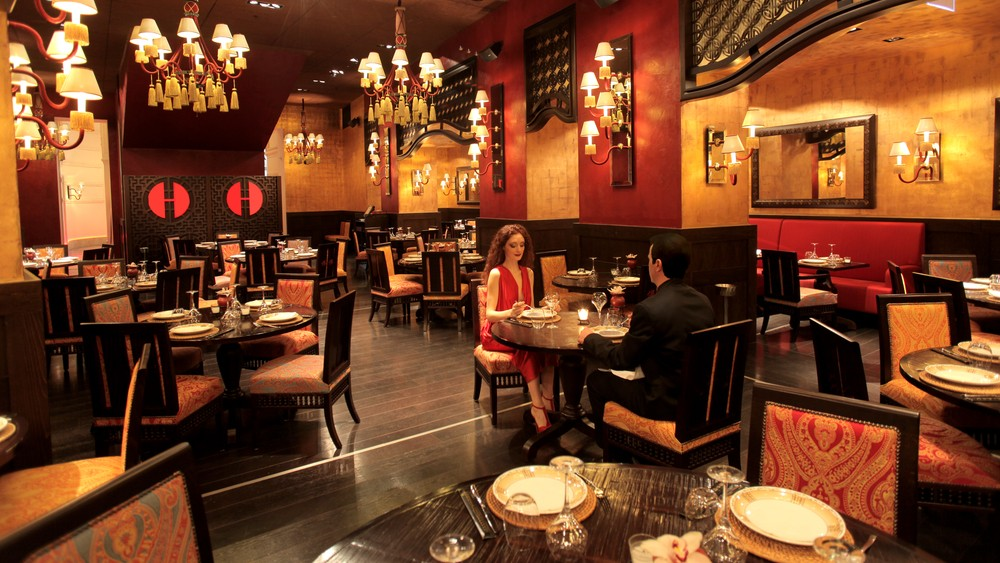

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [1]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt


Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [2]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')






### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [3]:
# PUT YOUR CODE HERE
df.head(5)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [4]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

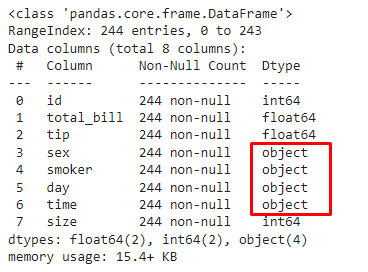

Let's fix their types and make them string:

In [5]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()


Check again (output columns and their types):

In [6]:
# PUT YOUR CODE HERE
df.info()










<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [7]:
# PUT YOUR CODE HERE
df.describe()










,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [8]:
# PUT YOUR CODE HERE
smoker_df = df[df['smoker'] == 'Yes']


Check whether everything is okay. Output a test sample (5 random rows):

In [9]:
# PUT YOUR CODE HERE
smoker_df.sample(5)




,id,total_bill,tip,sex,smoker,day,time,size
234,234,15.53,3.0,Male,Yes,Sat,Dinner,2
205,205,16.47,3.23,Female,Yes,Thur,Lunch,3
202,202,13.0,2.0,Female,Yes,Thur,Lunch,2
58,58,11.24,1.76,Male,Yes,Sat,Dinner,2
107,107,25.21,4.29,Male,Yes,Sat,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [10]:
# PUT YOUR CODE HERE
non_smoker_df = df[df['smoker'] == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [11]:
# PUT YOUR CODE HERE
non_smoker_df.sample(5)



,id,total_bill,tip,sex,smoker,day,time,size
28,28,21.7,4.3,Male,No,Sat,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
55,55,19.49,3.51,Male,No,Sun,Dinner,2
38,38,18.69,2.31,Male,No,Sat,Dinner,3
21,21,20.29,2.75,Female,No,Sat,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [12]:
# YOUR CODE
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()


Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [13]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [14]:
# YOUR CODE
smokers_tip_min = smoker_df['tip'].min()
smokers_tip_max = smoker_df['tip'].max()
smokers_tip_mean = smoker_df['tip'].mean()
smokers_tip_median = smoker_df['tip'].median()



Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [15]:
smoker_values = [smokers_tip_min,smokers_tip_max,smokers_tip_mean,smokers_tip_median]

smoker_values = map(lambda x: round(x, 4), smoker_values)

smoker_statistics = pd.DataFrame(smoker_values, index=['min', 'max', 'mean', 'median'])

smoker_statistics

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [16]:
# YOUR CODE
non_smokers_tip_min = non_smoker_df['tip'].min()
non_smokers_tip_max = non_smoker_df['tip'].max()
non_smokers_tip_mean = non_smoker_df['tip'].mean()
non_smokers_tip_median = non_smoker_df['tip'].median()








Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [17]:
# YOUR CODE
non_smoker_values = [non_smokers_tip_min,non_smokers_tip_max,non_smokers_tip_mean,non_smokers_tip_median]
non_smoker_values = map(lambda x: round(x, 4), non_smoker_values)
non_smoker_statistics = pd.DataFrame(non_smoker_values, index=['min', 'max', 'mean', 'median'])
non_smoker_statistics








,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [18]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1
2. Insight 1

**General conclusion:**

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

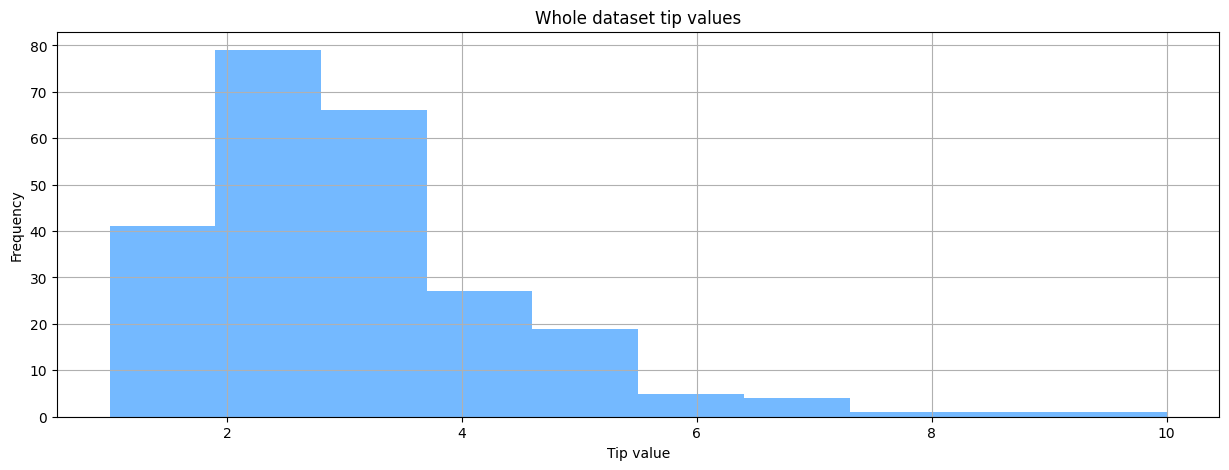

In [19]:
plt.figure(figsize=(15, 5))
plt.hist(df['tip'], color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()


##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

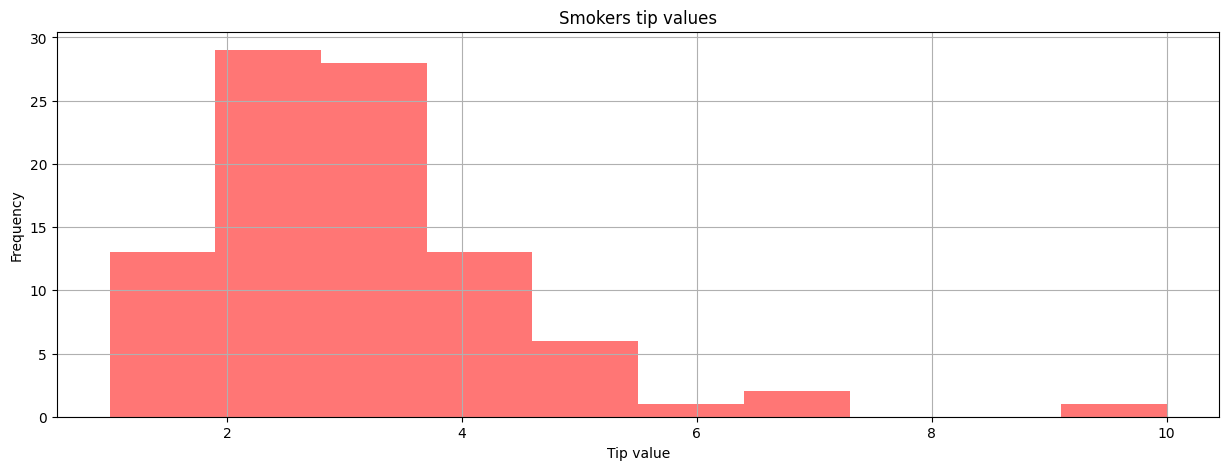

In [20]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smoker_df['tip'], color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)
plt.show()


##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

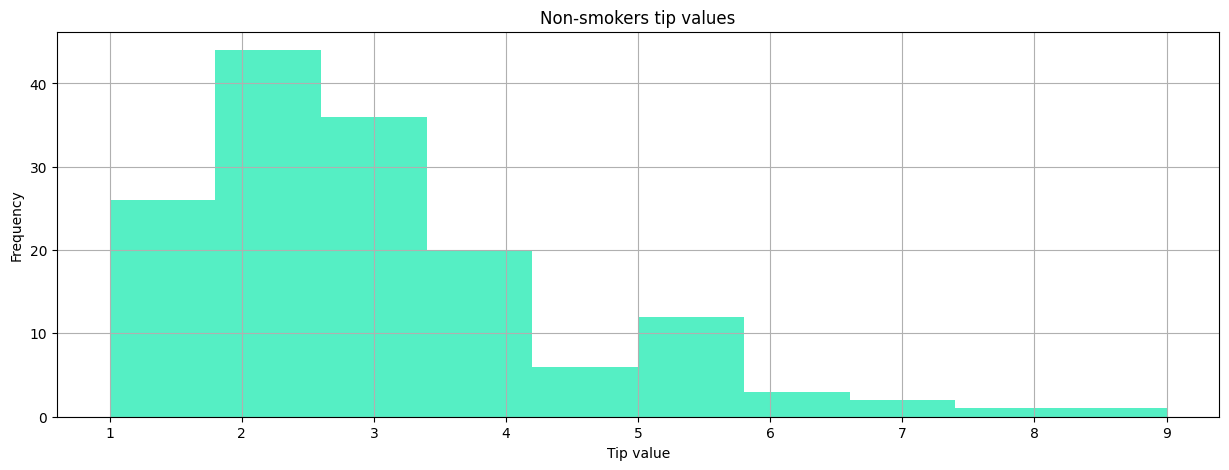

In [21]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smoker_df['tip'], color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)
plt.show()


##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

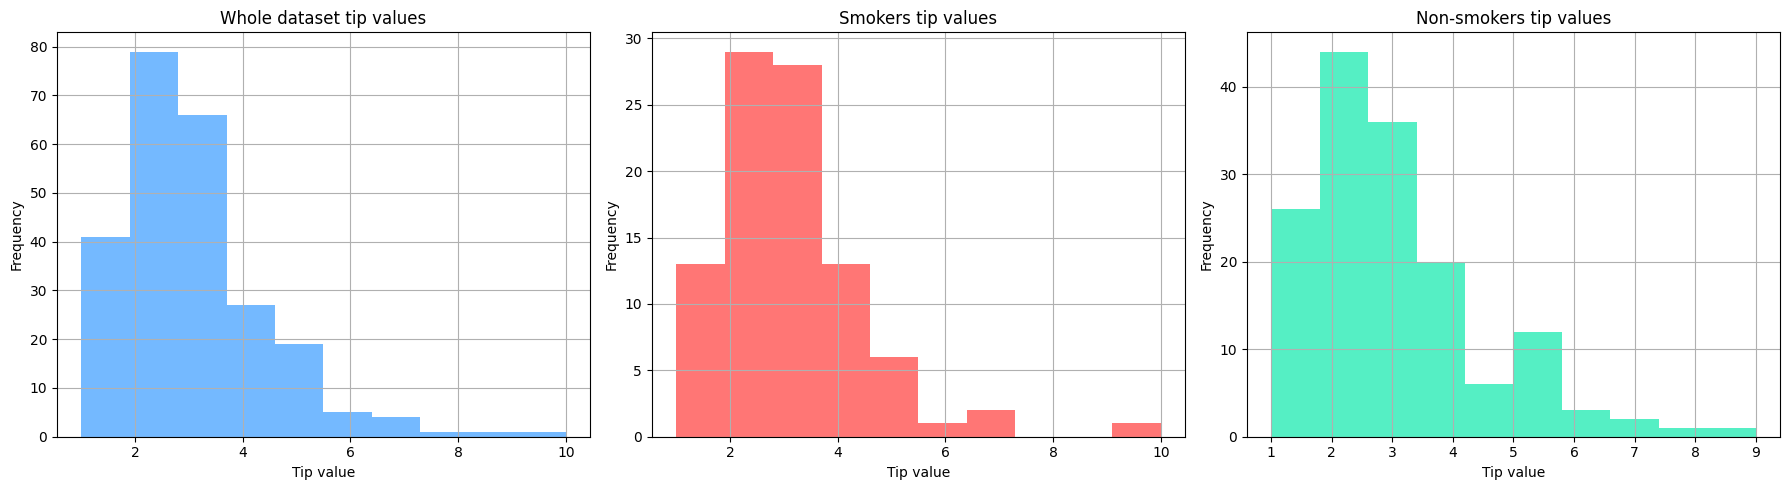

In [22]:
# YOUR CODE
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Whole dataset histogram
axes[0].hist(df['tip'], color='#74b9ff')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Whole dataset tip values')
axes[0].grid(True)

# Smokers histogram
axes[1].hist(smoker_df['tip'], color='#ff7675')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Smokers tip values')
axes[1].grid(True)

# Non-smokers histogram
axes[2].hist(non_smoker_df['tip'], color='#55efc4')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Non-smokers tip values')
axes[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

# Phân tích phân bố tiền tip

## Insight 1: Phân bố tiền tip của toàn bộ khách hàng

### Quan sát từ biểu đồ ta thấy:
- Phần lớn khách hàng tip trong khoảng **1-4 đô**, với đỉnh khoảng **2-3 đô**
- Có một số ít khách hàng tip rất cao (6-10 đô), tạo nên đuôi dài bên phải
- Phân bố cho thấy hành vi tip khá tập trung ở mức thấp-trung bình

## Insight 2: So sánh phân bố tiền tip giữa người hút thuốc và không hút thuốc

### Quan sát từ biểu đồ:
- **Người không hút thuốc**: Phân bố tập trung chủ yếu trong khoảng **1-4 đô**, với đỉnh rõ rệt khoảng **2 đô**
- **Người hút thuốc**: Phân bố cũng tập trung trong khoảng **1-4 đô** nhưng có vẻ **phẳng hơn** và **ít tập trung** so với nhóm không hút thuốc


##  Kết luận

### Về số liệu :
- Người hút thuốc có **mean** (3.01) và **median** (3.00) cao hơn một chút so với người không hút thuốc (mean: 2.99, median: 2.74)
- Sự khác biệt này là **rất nhỏ** 

### Về phân bố:
- **Người không hút thuốc**: Phân bố **tập trung hơn** quanh mức 2 đô, cho thấy hành vi tip **nhất quán hơn**
- **Người hút thuốc**: Phân bố **phẳng hơn**, cho thấy **sự đa dạng lớn hơn** trong hành vi tip

### Về giá trị :
- Người hút thuốc có khả năng tip cao nhất (10 đô) trong khi người không hút thuốc chỉ đến 9 đô

###  Kết luận chính:
Mặc dù người hút thuốc có xu hướng tip **trung bình cao hơn một chút**, sự khác biệt là **không đáng kể**. Điểm khác biệt chính là:
- **Người không hút thuốc** có hành vi tip **ổn định và có thể dự đoán hơn**
- **Người hút thuốc** có hành vi tip **đa dạng hơn**, bao gồm cả những khoản tip rất cao và có thể cả những khoản thấp

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

### Create mafe_df and female_df

In [23]:
male_df=df[df['sex']=='Male']
male_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
241,241,22.67,2.0,Male,Yes,Sat,Dinner,2
166,166,20.76,2.24,Male,No,Sun,Dinner,2
210,210,30.06,2.0,Male,Yes,Sat,Dinner,3
182,182,45.35,3.5,Male,Yes,Sun,Dinner,3
107,107,25.21,4.29,Male,Yes,Sat,Dinner,2


In [24]:
female_df=df[df['sex']=='Female']
female_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
71,71,17.07,3.0,Female,No,Sat,Dinner,3
168,168,10.59,1.61,Female,Yes,Sat,Dinner,2
202,202,13.0,2.0,Female,Yes,Thur,Lunch,2
209,209,12.76,2.23,Female,Yes,Sat,Dinner,2
143,143,27.05,5.0,Female,No,Thur,Lunch,6


### Descriptive statistics of tips by female gender

In [25]:
female_tip_min=female_df['tip'].min()
female_tip_max=female_df['tip'].max()
female_tip_mean=female_df['tip'].mean()
female_tip_median=female_df['tip'].median()

### Display the statistical results values describing tips ***by female*** gender

In [26]:
female_values = [female_tip_min, female_tip_max, female_tip_mean, female_tip_median]
female_values = map(lambda x: round(x, 4), female_values)
female_statistics = pd.DataFrame(female_values, index=['Min', 'Max', 'Mean', 'Median'], columns=['Female'])
female_statistics

,Female
Min,1.0000
Max,6.5000
Mean,2.8334
Median,2.7500


### Descriptive statistics of tips by male gender

In [27]:
male_tip_min=male_df['tip'].min()
male_tip_max=male_df['tip'].max()
male_tip_mean=male_df['tip'].mean()
male_tip_median=male_df['tip'].median()

### Display the statistical results values describing tips ***by female*** gender

In [28]:
male_values = [male_tip_min, male_tip_max, male_tip_mean, male_tip_median]
male_values = map(lambda x: round(x, 4), male_values)
male_statistics = pd.DataFrame(male_values, index=['Min', 'Max', 'Mean', 'Median'], columns=['Male'])
male_statistics

,Male
Min,1.0000
Max,10.0000
Mean,3.0896
Median,3.0000


### Create and combine data tables (DataFrame) by gender

In [29]:
all_vals_dict_gender = {
    
    'common': 
        {'min': common_tip_min,
        'max': common_tip_max,
        'mean': common_tip_mean,
        'median': common_tip_median},
    
    'female': 
        {'min': female_tip_min,
        'max': female_tip_max,
        'mean': female_tip_mean,
        'median': female_tip_median},
    'male': 
        {'min': male_tip_min,
        'max': male_tip_max,
        'mean': male_tip_mean,
        'median': male_tip_median}
}
# Make a dataframe
all_mct_gender = pd.DataFrame(all_vals_dict_gender)
# Output the dataframe
all_mct_gender

,common,female,male
min,1.000000,1.000000,1.000000
max,10.000000,6.500000,10.000000
mean,2.998279,2.833448,3.089618
median,2.900000,2.750000,3.000000


### Plot the histogram tips distribution.

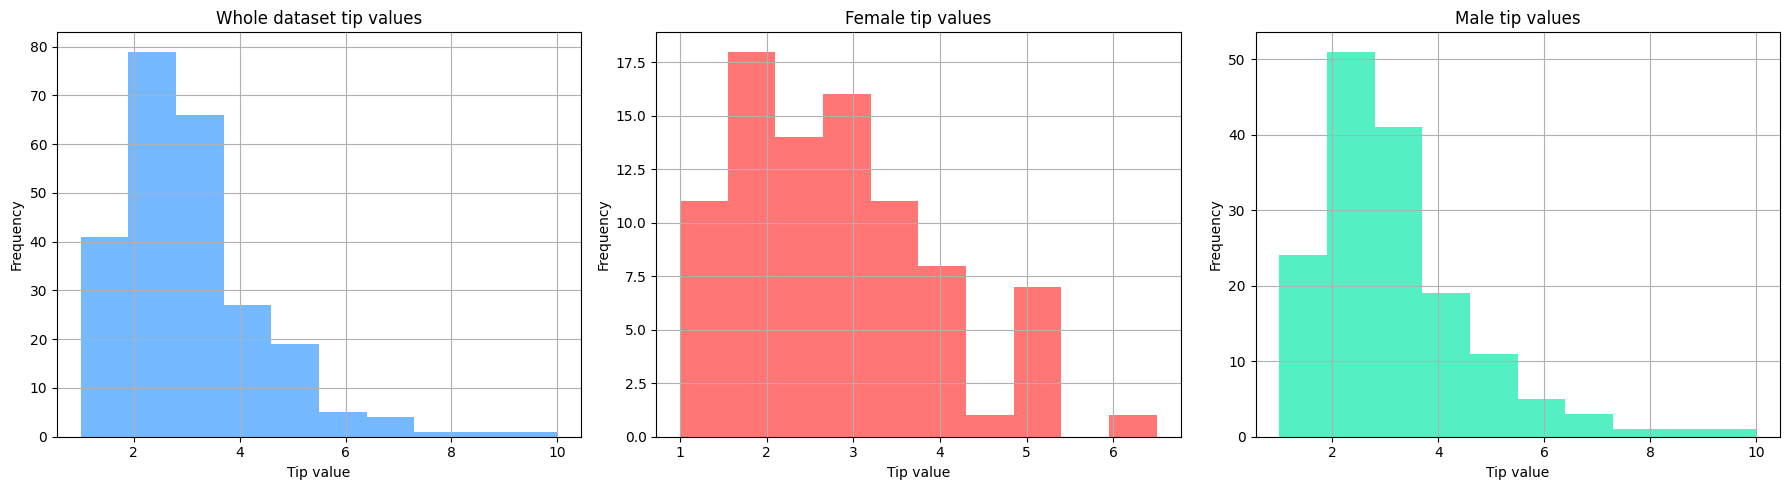

In [66]:
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Whole dataset histogram
axes[0].hist(df['tip'], color='#74b9ff')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Whole dataset tip values')
axes[0].grid(True)

# Female histogram
axes[1].hist(female_df['tip'], color='#ff7675')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Female tip values')
axes[1].grid(True)

# Male histogram
axes[2].hist(male_df['tip'], color='#55efc4')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Male tip values')
axes[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

 ###  Insight & Conclusion

 - **Phân phối tiền tip theo giới tính cho thấy:** Nam có xu hướng để tiền tip cao hơn nữ  
 -Trung bình: nam 3.09 > nữ 2,83  
 -Trung vị: nam 3.00 > nữ 2.75  
 -Tuy nhiên, mức tip phổ biến (median) giữa hai giới không chênh lệch nhiều.  
 - Phạm vi tip của nữ hẹp hơn so với nam ít có gia trị quá cao cho thấy ít có sự biến động so với nam  
 - Nam có nhiều giá trị ourlier (tận 10 đô ) điều này làm ảnh hướng đến giá trị mean 
 - **Phổ tip của toàn bộ dữ liệu** tập trung chủ yếu ở mức 2-4 đơn vị tiền, rất ít trường hợp tip vượt quá 6.
 - **Kết luận:** Dù có sự khác biệt nhỏ về mức tip trung bình giữa nam và nữ, nhưng nhìn chung hành vi tip của khách hàng khá đồng đều, không có sự chênh lệch quá lớn giữa các nhóm giới tính.


### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [31]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: Int64

### Separate Weekend and Weekday data

In [32]:
# Định nghĩa các ngày cuối tuần và ngày thường
weekend_days = ['Sat', 'Sun']
weekday_days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']

# Hàm phân loại ngày
def classify_day(x):
    if x in weekend_days:
        return 'Weekend'
    elif x in weekday_days:
        return 'Weekday'
    else:
        return 'Unknown'  


### Add categorical column to DataFrame

In [33]:

df['is_weekend'] = df['day'].apply(classify_day)
df.sample(10)

,id,total_bill,tip,sex,smoker,day,time,size,is_weekend
20,20,17.92,4.08,Male,No,Sat,Dinner,2,Weekend
156,156,48.17,5.0,Male,No,Sun,Dinner,6,Weekend
88,88,24.71,5.85,Male,No,Thur,Lunch,2,Weekday
210,210,30.06,2.0,Male,Yes,Sat,Dinner,3,Weekend
226,226,10.09,2.0,Female,Yes,Fri,Lunch,2,Weekday
47,47,32.4,6.0,Male,No,Sun,Dinner,4,Weekend
130,130,19.08,1.5,Male,No,Thur,Lunch,2,Weekday
163,163,13.81,2.0,Male,No,Sun,Dinner,2,Weekend
112,112,38.07,4.0,Male,No,Sun,Dinner,3,Weekend
133,133,12.26,2.0,Female,No,Thur,Lunch,2,Weekday


### Create dataframe weekend_df

In [34]:
weekend_df=df[df['is_weekend']=='Weekend']
weekend_df.head()

,id,total_bill,tip,sex,smoker,day,time,size,is_weekend
0,0,16.99,1.01,Female,No,Sun,Dinner,2,Weekend
1,1,10.34,1.66,Male,No,Sun,Dinner,3,Weekend
2,2,21.01,3.5,Male,No,Sun,Dinner,3,Weekend
3,3,23.68,3.31,Male,No,Sun,Dinner,2,Weekend
4,4,24.59,3.61,Female,No,Sun,Dinner,4,Weekend


### Create dataframe weekday_df

In [35]:
weekday_df=df[df['is_weekend']=='Weekday']
weekday_df.head()

,id,total_bill,tip,sex,smoker,day,time,size,is_weekend
77,77,27.2,4.0,Male,No,Thur,Lunch,4,Weekday
78,78,22.76,3.0,Male,No,Thur,Lunch,2,Weekday
79,79,17.29,2.71,Male,No,Thur,Lunch,2,Weekday
80,80,19.44,3.0,Male,Yes,Thur,Lunch,2,Weekday
81,81,16.66,3.4,Male,No,Thur,Lunch,2,Weekday


### Descriptive statistics of tips by ***weekend***

In [36]:
weekend_tip_min=weekend_df['tip'].min()
weekend_tip_max=weekend_df['tip'].max()
weekend_tip_mean=weekend_df['tip'].mean()
weekend_tip_median=weekend_df['tip'].median()

### Display the statistical results values describing tips ***Weekend*** 

In [37]:
weekend_values = [weekend_tip_min, weekend_tip_max, weekend_tip_mean, weekend_tip_median]
weekend_values = map(lambda x: round(x, 4), weekend_values)
weekend_statistics = pd.DataFrame(weekend_values, index=['Min', 'Max', 'Mean', 'Median'], columns=['Weekend'])
weekend_statistics

,Weekend
Min,1.0000
Max,10.0000
Mean,3.1153
Median,3.0000


### Descriptive statistics of tips by ***weekday***

In [38]:
weekday_tip_min=weekday_df['tip'].min()
weekday_tip_max=weekday_df['tip'].max()
weekday_tip_mean=weekday_df['tip'].mean()
weekday_tip_median=weekday_df['tip'].median()

### Display the statistical results values describing tips ***Weekend*** 

In [39]:
weekday_values = [weekday_tip_min, weekday_tip_max, weekday_tip_mean, weekday_tip_median]
weekday_values = map(lambda x: round(x, 4), weekday_values)
weekday_statistics = pd.DataFrame(weekday_values, index=['Min', 'Max', 'Mean', 'Median'], columns=['Weekday'])
weekday_statistics

,Weekday
Min,1.0000
Max,6.7000
Mean,2.7628
Median,2.5000


### Create and combine data tables (DataFrame) by weekdays and weekends

In [40]:
all_vals_dict_day = {
    
    'common': 
        {'min': common_tip_min,
        'max': common_tip_max,
        'mean': common_tip_mean,
        'median': common_tip_median},
    
    'weekend': 
        {'min': weekend_tip_min,
        'max': weekend_tip_max,
        'mean': weekend_tip_mean,
        'median': female_tip_median},
     'weekday': 
        {'min': weekday_tip_min,
        'max': weekday_tip_max,
        'mean': weekday_tip_mean,
        'median': weekday_tip_median}
}
# Make a dataframe
all_mct_day = pd.DataFrame(all_vals_dict_day)
# Output the dataframe
all_mct_day

,common,weekend,weekday
min,1.000000,1.000000,1.00000
max,10.000000,10.000000,6.70000
mean,2.998279,3.115276,2.76284
median,2.900000,2.750000,2.50000


### Plot the histogram tips distribution.

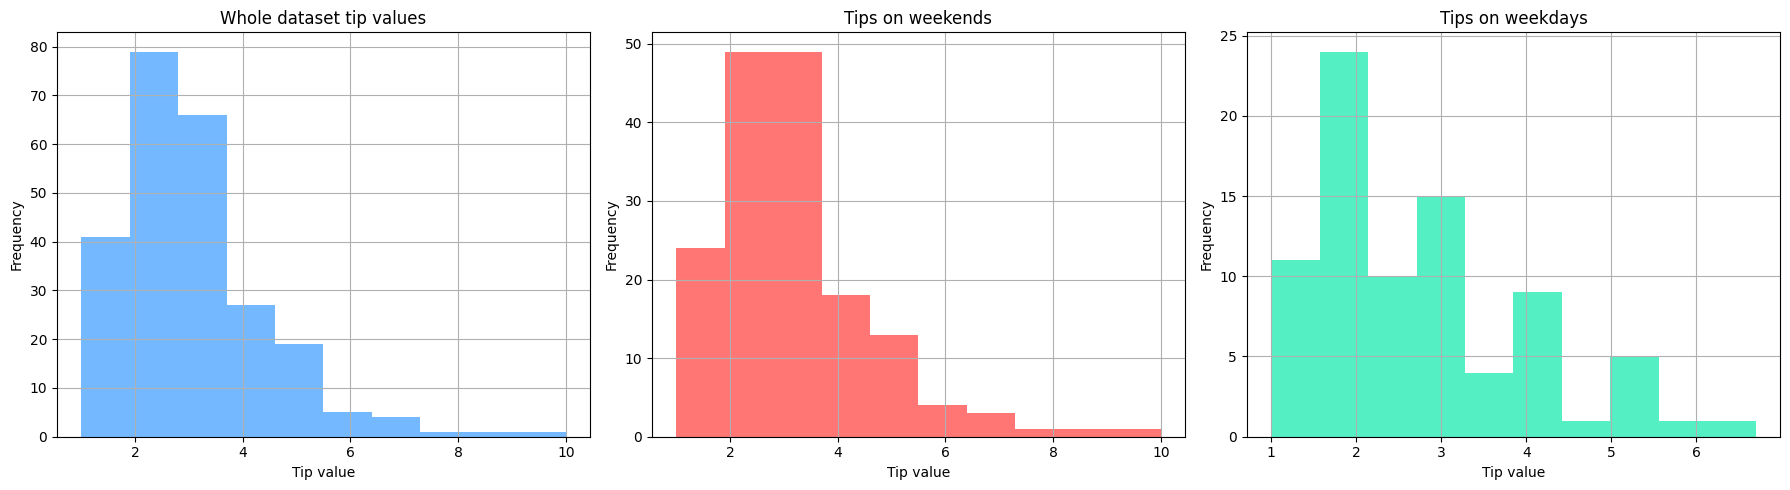

In [ ]:
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Whole dataset histogram
axes[0].hist(df['tip'], color='#74b9ff')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Whole dataset tip values')
axes[0].grid(True)

# Weekend histogram
axes[1].hist(weekend_df['tip'], color='#ff7675')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Tips on weekends')
axes[1].grid(True)

# Weekday histogram
axes[2].hist(weekday_df['tip'], color='#55efc4')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Tips on weekdays')
axes[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

###  Insight 

Khi so sánh tiền tip giữa **cuối tuần (Weekend)** và **ngày thường (Weekday)**, ta rút ra những điểm nổi bật:

- **Trung bình (mean)** tiền tip vào **cuối tuần** là **3.115**, cao hơn đáng kể so với **ngày thường** là **2.762**.
- **Trung vị (median)** cũng cho thấy xu hướng tương tự: **2.75 (cuối tuần)** > **2.5 (ngày thường)**.
- **Giá trị tip lớn nhất** vào cuối tuần là **10.0**, trong khi ngày thường chỉ đạt **6.7** → thể hiện khả năng xuất hiện các **tip rất lớn vào cuối tuần**.
- **Histograms**:
  - Biểu đồ cuối tuần cho thấy **phân phối nghiêng trái** với nhiều giá trị tip cao hơn .
  - Biểu đồ ngày thường có **tập trung nhiều ở mức tip thấp hơn** (1–3 USD), thể hiện hành vi tip dè dặt hơn trong tuần.


---

###  Conclusion 

 Cuối tuần mang lại tiền tip cao hơn rõ rệt so với ngày thường. Có nhiều khách tip thường xuyên vào cuối tuần vì số lượng lần tip cao hơn tần suất lớn hơn ( nhìn vào cột Y frequency) và trải dài ở các mức tip cao hơnhơn

Cả **trung bình, trung vị và giá trị tối đa** đều cao hơn vào cuối tuần, cùng với phân phối tip trải rộng hơn về phía cao. Điều này chứng minh rằng **hành vi tiêu dùng của khách hàng vào cuối tuần thoáng hơn**, dẫn đến việc tip cao hơn.

 Do đó, **các nhà hàng có thể tập trung nhân lực, tăng dịch vụ và tối ưu doanh thu từ tip vào cuối tuần**.


### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

In [42]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: Int64

### Create lunch_df

In [54]:
lunch_df = df[df['time'] == 'Lunch']
lunch_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size,is_weekend
144,144,16.43,2.3,Female,No,Thur,Lunch,2,Weekday
194,194,16.58,4.0,Male,Yes,Thur,Lunch,2,Weekday
86,86,13.03,2.0,Male,No,Thur,Lunch,2,Weekday
89,89,21.16,3.0,Male,No,Thur,Lunch,2,Weekday
122,122,14.26,2.5,Male,No,Thur,Lunch,2,Weekday


### Create dinner_df

In [55]:
dinner_df = df[df['time'] == 'Dinner']
dinner_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size,is_weekend
95,95,40.17,4.73,Male,Yes,Fri,Dinner,4,Weekday
66,66,16.45,2.47,Female,No,Sat,Dinner,2,Weekend
240,240,27.18,2.0,Female,Yes,Sat,Dinner,2,Weekend
187,187,30.46,2.0,Male,Yes,Sun,Dinner,5,Weekend
236,236,12.6,1.0,Male,Yes,Sat,Dinner,2,Weekend


### Descriptive statistics of tips by ***lunch***

In [60]:
lunch_tip_min = lunch_df['tip'].min()
lunch_tip_max = lunch_df['tip'].max()
lunch_tip_mean = lunch_df['tip'].mean()
lunch_tip_median = lunch_df['tip'].median()


### Display the statistical results values describing tips ***lunch*** 

In [61]:
lunch_values = [lunch_tip_min, lunch_tip_max, lunch_tip_mean, lunch_tip_median]
lunch_values = map(lambda x: round(x, 4), lunch_values)
lunch_statistics = pd.DataFrame(lunch_values, index=['Min', 'Max', 'Mean', 'Median'], columns=['Lunch'])
lunch_statistics

,Lunch
Min,1.2500
Max,6.7000
Mean,2.7281
Median,2.2500


### Descriptive statistics of tips by ***dinner***

In [57]:
dinner_tip_min = dinner_df['tip'].min()
dinner_tip_max = dinner_df['tip'].max()
dinner_tip_mean = dinner_df['tip'].mean()
dinner_tip_median = dinner_df['tip'].median()

### Display the statistical results values describing tips ***dinner*** 

In [62]:
dinner_values = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
dinner_values = map(lambda x: round(x, 4), dinner_values)
dinner_statistics = pd.DataFrame(dinner_values, index=['Min', 'Max', 'Mean', 'Median'], columns=['Dinner'])
dinner_statistics

,Dinner
Min,1.0000
Max,10.0000
Mean,3.1027
Median,3.0000


### Create and combine data tables (DataFrame) by lunch and dinner

In [64]:
all_vals_dict_meal = {
    
    'common': 
        {'min': common_tip_min,
        'max': common_tip_max,
        'mean': common_tip_mean,
        'median': common_tip_median},
    
    'lunch': 
        {'min': lunch_tip_min,
        'max': lunch_tip_max,
        'mean': lunch_tip_mean,
        'median': lunch_tip_median},
     'dinner': 
        {'min': dinner_tip_min,
        'max': dinner_tip_max,
        'mean': dinner_tip_mean,
        'median': dinner_tip_median}
}
# Make a dataframe
all_mct_meal = pd.DataFrame(all_vals_dict_meal)
# Output the dataframe
all_mct_meal

,common,lunch,dinner
min,1.000000,1.250000,1.00000
max,10.000000,6.700000,10.00000
mean,2.998279,2.728088,3.10267
median,2.900000,2.250000,3.00000


### Plot the histogram tips distribution.

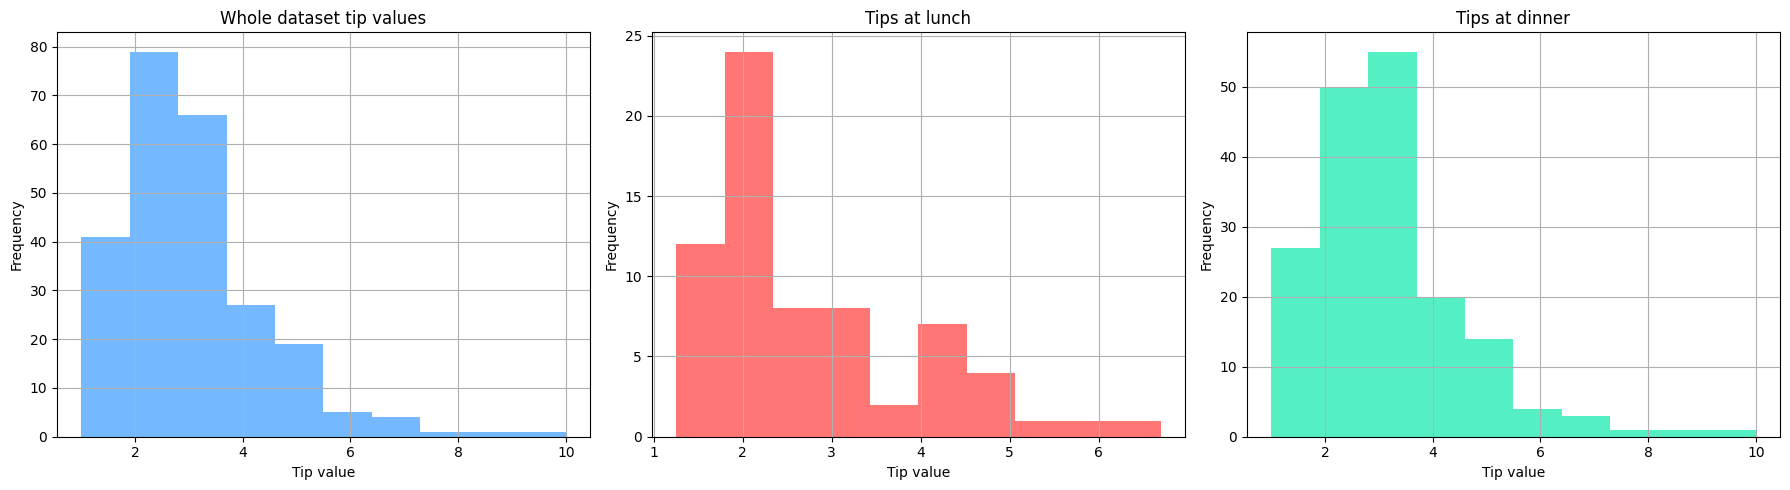

In [65]:
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Whole dataset histogram
axes[0].hist(df['tip'], color='#74b9ff')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Whole dataset tip values')
axes[0].grid(True)

# Lunch histogram
axes[1].hist(lunch_df['tip'], color='#ff7675')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Tips at lunch')
axes[1].grid(True)

# Dinner histogram
axes[2].hist(dinner_df['tip'], color='#55efc4')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Tips at dinner')
axes[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Axes: xlabel='time', ylabel='tip'>

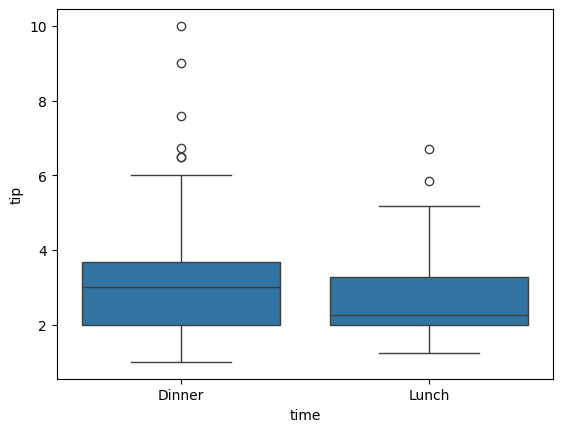

In [68]:
import seaborn as sns
sns.boxplot(x='time', y='tip', data=df)


 ### Insights and Conclusions about Tips by Meal Time
 
 Từ bảng all_mct_meal, biểu đồ histogram và boxplot, chúng ta có thể quan sát thấy:
 
 1. **Tiền boa bữa trưa**:
 - Tiền boa thấp hơn so với bữa tối
 - Tiền boa trung bình: 2,73 đô la, Trung vị: 2,25 đô la
 - Phân phối tập trung hơn trong khoảng từ 1 đến 3 đô la
 - Tiền boa tốii đa vào bữa trưa là 6,70 đô la
 - Boxplot cho thấy ít outliers hơn so với bữa tối
 
 2. **Tiền boa bữa tối**:
 - Tiền boa cao hơn so với bữa trưa
 - Tiền boa trung bình: 3,10 đô la, Trung vị: 3,00 đô la
 - Phân phối rộng hơn với nhiều tiền boa có giá trị cao hơn
 - Tiền boa tối đa đạt 10 đô la
 - Boxplot cho thấy nhiều outliers ở mức cao hơn
 
 **Kết luận chính**:
 - Khách hàng có xu hướng boa hào phóng hơn vào bữa tối so với bữa trưa
 - Tiền boa trung bình vào bữa tối cao hơn so với bữa trưa
 - Trong khi tiền boa cho bữa trưa ổn định hơn, tiền boa cho bữa tối lại biến động nhiều hơn với nhiều giá trị cao bất thường
 - Boxplot xác nhận sự khác biệt rõ rệt về phân phối tiền boa giữa hai bữa ăn
 - Sự khác biệt trong hành vi boa tiền có thể phản ánh bối cảnh và kỳ vọng ăn uống khác nhau giữa bữa trưa và bữa tối

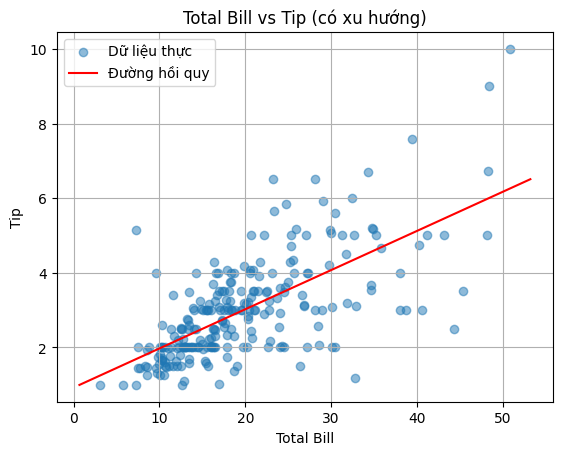

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Vẽ scatter
plt.scatter(df['total_bill'], df['tip'], alpha=0.5, label='Dữ liệu thực')

# Tính đường hồi quy tuyến tính
slope, intercept = np.polyfit(df['total_bill'], df['tip'], 1)
x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals

# Vẽ line
plt.plot(x_vals, y_vals, color='red', label='Đường hồi quy')

plt.title('Total Bill vs Tip (có xu hướng)')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.grid(True)
plt.show()
